Práctica Nro. 2

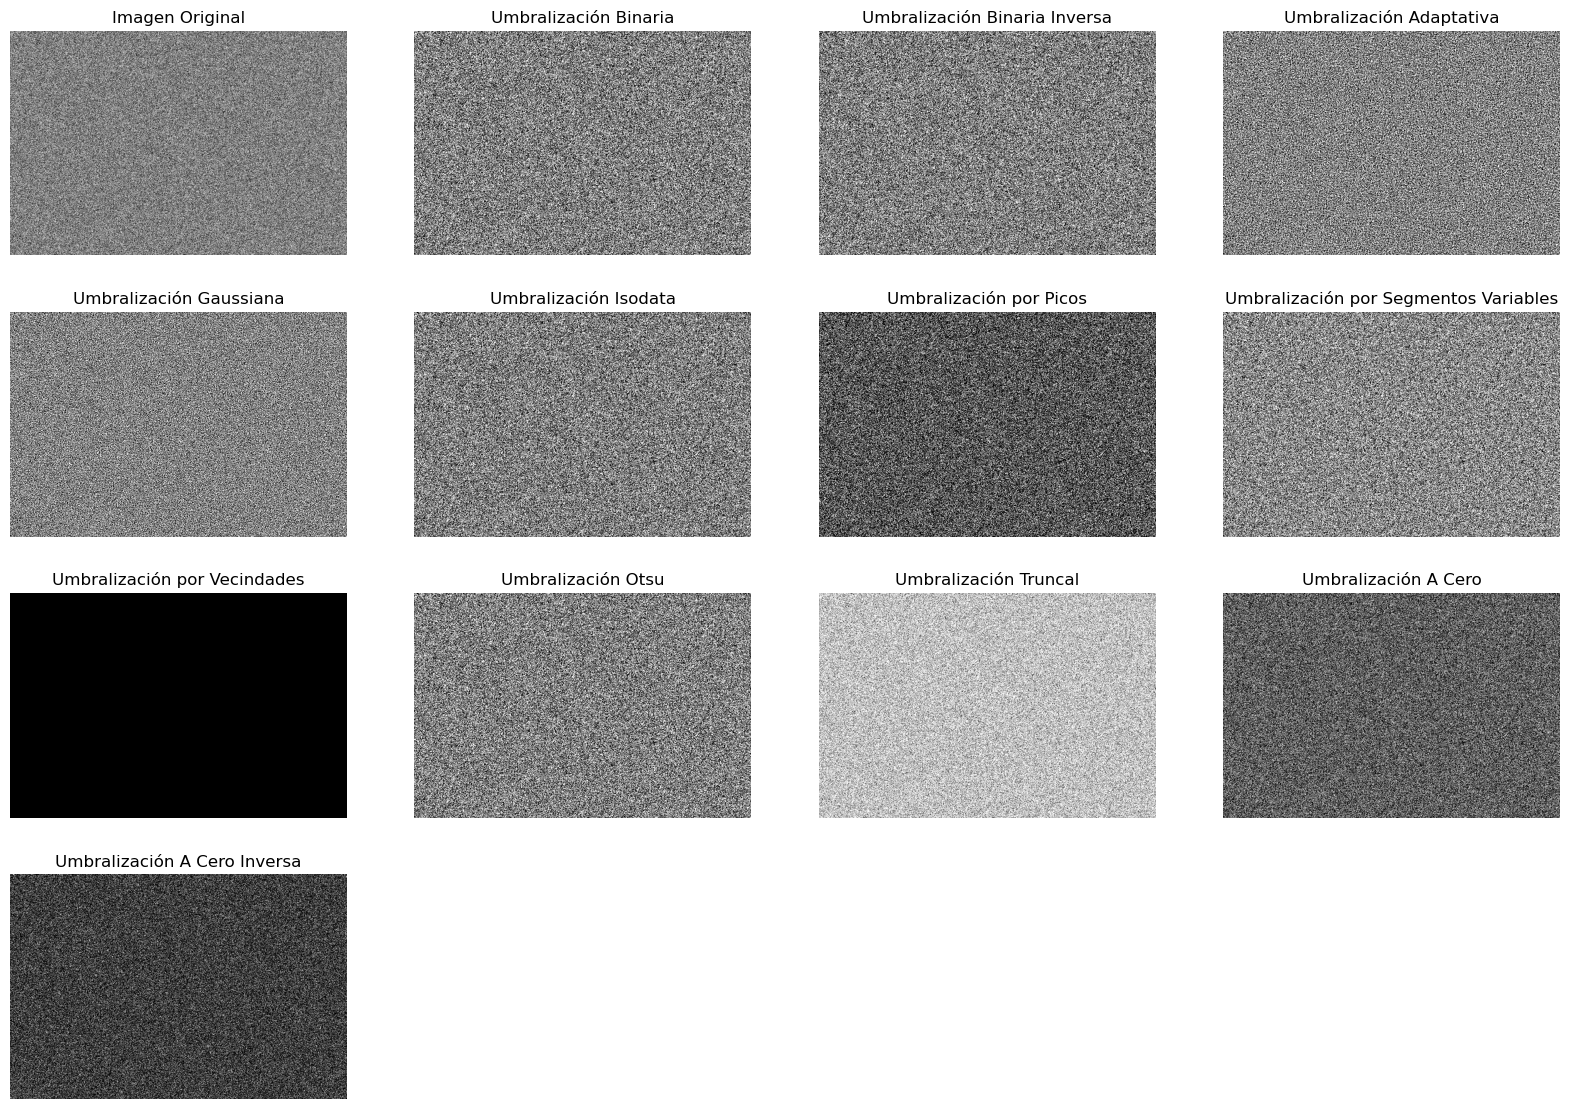

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def umb_binary(img):
    _,umbralbi = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #Aplicando binarización
    return umbralbi

def umb_binary_inv(img):
    _,umbral_bi_inverso = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) #Aplicando binarización inversa
    return umbral_bi_inverso

def umb_adaptive(img):
    umbral_adaptive = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9,3) #Aplicamos Umbral Adaptativo
    return umbral_adaptive

def umb_gaussian(img):
    umbral_adaptive_gaus = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,3) #Aplicando Umbral Gausiano
    return umbral_adaptive_gaus

    #-------------------------------------------------------------------------------------------------#

def umb_isodata(img):
    threshold = 128
    while True:
        group1 = img[img <= threshold] # grupo donde el umbral es menor o igual al determinado
        group2 = img[img > threshold] # grupo donde el umbral es mayor al determinado
        # Se calcula la media de cada grupo
        media1 = np.mean(group1)
        media2 = np.mean(group2)
        # Nuevo umbral
        new_threshold = (media1 + media2) / 2 # segun formula 
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(new_threshold - threshold) < 0.5:
            break
        threshold = new_threshold

    _, img_thresholded = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    return img_thresholded

def umb_picos(img):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([img],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)

    _, img_umb_spikes = cv2.threshold(img, umbral, 255, cv2.THRESH_BINARY)
    
    return img_umb_spikes

def umb_seg_variables(img,block_size, c): #Ej. block_size = 25, c=9
    img_seg_var = np.zeros_like(img)
    for y in range(0, img.shape[0], block_size):
        for x in range(0, img.shape[1], block_size):
            block = img[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            threshold = block_mean - c
            img_seg_var[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return img_seg_var

def umb_seg_vecinal(img, block_size, offset):
    img_seg_vec = np.zeros_like(img)
    for y in range(0, img.shape[0], block_size):
        for x in range(0, img.shape[1], block_size):
            block = img[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (offset * block_std)
            img_seg_vec[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return img_seg_vec

def umb_otsu(img):
    _, img_umb_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img_umb_otsu

def umb_truncal(img):
    _,umb_trunc_original = cv2.threshold(img,128,255,cv2.THRESH_TRUNC)
    return umb_trunc_original

def umb_to_zero(img):
    _,umb_to_zero_original = cv2.threshold(img,128,255,cv2.THRESH_TOZERO)
    return umb_to_zero_original

def umb_to_zero_inv(img):
    _,umb_to_zero_inv_original = cv2.threshold(img,128,255,cv2.THRESH_TOZERO_INV)
    return umb_to_zero_inv_original

#*************Aplicación de los Métodos*********************
img_rdn = np.random.randint(0,256,(600,900),dtype=np.uint8) #Generando una imagen aleatoria.

#img_gray = cv2.imread('Shar.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 14))

plt.subplot(4, 4, 1)
plt.imshow(img_rdn, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(4, 4, 2)
plt.imshow(umb_binary(img_rdn), cmap="gray")
plt.title("Umbralización Binaria")
plt.axis("off")

plt.subplot(4, 4, 3)
plt.imshow(umb_binary_inv(img_rdn), cmap="gray")
plt.title("Umbralización Binaria Inversa")
plt.axis("off")

plt.subplot(4, 4, 4)
plt.imshow(umb_adaptive(img_rdn), cmap="gray")
plt.title("Umbralización Adaptativa")
plt.axis("off")

plt.subplot(4, 4, 5)
plt.imshow(umb_gaussian(img_rdn), cmap="gray")
plt.title("Umbralización Gaussiana")
plt.axis("off")

plt.subplot(4, 4, 6)
plt.imshow(umb_isodata(img_rdn), cmap="gray")
plt.title("Umbralización Isodata")
plt.axis("off")

plt.subplot(4, 4, 7)
plt.imshow(umb_picos(img_rdn), cmap="gray")
plt.title("Umbralización por Picos")
plt.axis("off")

plt.subplot(4, 4, 8)
plt.imshow(umb_seg_variables(img_rdn,27,9), cmap="gray")
plt.title("Umbralización por Segmentos Variables")
plt.axis("off")

plt.subplot(4, 4, 9)
plt.imshow(umb_seg_vecinal(img_rdn,2,100), cmap="gray")
plt.title("Umbralización por Vecindades")
plt.axis("off")

plt.subplot(4, 4, 10)
plt.imshow(umb_otsu(img_rdn), cmap="gray")
plt.title("Umbralización Otsu")
plt.axis("off")

plt.subplot(4, 4, 11)
plt.imshow(umb_truncal(img_rdn), cmap="gray")
plt.title("Umbralización Truncal")
plt.axis("off")

plt.subplot(4, 4, 12)
plt.imshow(umb_to_zero(img_rdn), cmap="gray")
plt.title("Umbralización A Cero")
plt.axis("off")

plt.subplot(4, 4, 13)
plt.imshow(umb_to_zero_inv(img_rdn), cmap="gray")
plt.title("Umbralización A Cero Inversa")
plt.axis("off")

plt.show()